In [1]:
from utils import set_root

from pytorch_lightning import seed_everything

seed_everything(42)
set_root()

from physioex.data import PhysioExDataset

Seed set to 42


Current working directory: /home/guido/github/physioex-private


In [3]:
dataset = PhysioExDataset(
    data_folder="/mnt/guido-data/",
    datasets=["mass"],
    selected_channels=["EEG", "EOG", "EMG"],
)

2024-09-12 12:48:36.625 | INFO     | physioex.utils.data_folder:set_data_folder:26 - Data folder set to /mnt/guido-data/


In [21]:
seq_epochs, seq_labels = dataset[310]

print(seq_epochs.shape, seq_labels.shape)

torch.Size([21, 3, 3000]) torch.Size([21])


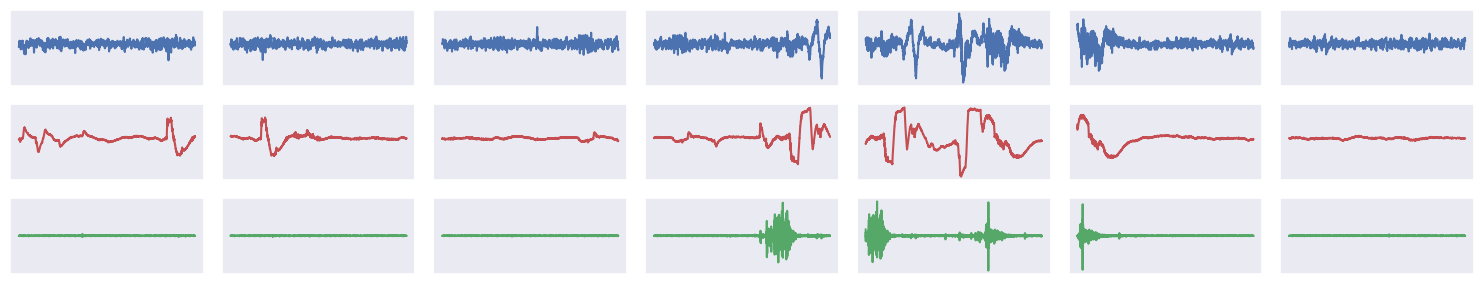

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# construct the figure
fig, axs = plt.subplots(3, 7, figsize=(15, 3), sharex=True, sharey="row")

# plot each channel in a row, and each epoch in a column

for i, channel in enumerate(["EEG", "EOG", "EMG"]):
    for j in range(7):
        # Ensure the data is 2D
        data = seq_epochs[j, i]
        data = data.reshape(-1)
        # set blue color for EEG, red for EOG and green for EMG
        sns.lineplot(
            x=list(range(len(data))),
            y=data.numpy(),
            ax=axs[i, j],
            color=["b", "r", "g"][i],
        )

        # remove x and y axis and labels
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].set_xlabel("")
        axs[i, j].set_ylabel("")

        # axs[i, j].set_title(f"{channel} epoch {j}")

# Set the background color of the figure to transparent
fig.patch.set_alpha(0.0)

# Save the figure with a transparent background
plt.tight_layout()
plt.savefig("input.png", transparent=True)
plt.show()